In [1]:
'''
REQUIREMENTS:
- Python version                     3.8.5
- opencv-python                      4.7.0.72
- matplotlib                         3.3.2
- pandas                             1.1.1
- pyfeats                            1.0.0
- os
- re

DATASET:
Minarno, Agus Eko; Nugroho, Hanung Adi; Soesanti, Indah (2023), “Batik Nitik 960”, Mendeley Data, V3, doi: 10.17632/sgh484jxzy.3

Link dataset: https://data.mendeley.com/datasets/vz7pzt2grf
'''

'\nREQUIREMENTS:\n- Python version            3.8.5\n- opencv-python             4.8.0.76\n- matplotlib                3.7.2\n- pandas\n- os\n- re\n\nDATASET:\nMinarno, Agus Eko; Nugroho, Hanung Adi; Soesanti, Indah (2023), “Batik Nitik 960”, Mendeley Data, V3, doi: 10.17632/sgh484jxzy.3\n\nLink dataset: https://data.mendeley.com/datasets/vz7pzt2grf\n'

Import Images

In [2]:
import cv2
import os
import re

def import_images(folder_path):
    # Buat list kosong buat penampung images dan label images
    images = []
    labels = []
    # inisialiasi bentuk regex
    pattern = r'[ _]+'
    # Memeriksa apakah folder tersebut ada
    if os.path.exists(folder_path):
        # Mendapatkan daftar file dalam folder
        files = os.listdir(folder_path)
        # Loop melalui setiap file dalam folder
        for file_name in files:
            # Memeriksa apakah file tersebut adalah file gambar (misalnya, dengan ekstensi .jpg atau .png)
            if file_name.endswith(('.jpg', '.png', '.jpeg')):
                # Menggabungkan path lengkap ke file gambar
                image_path = os.path.join(folder_path, file_name)
                file_name = os.path.basename(image_path)

                """
                #############################################################################
                Kode di bawah digunakan untuk mencari label kelas atau jenis batiknya
                di sini saya menggunakan regex untuk mengekstrak teks nama jenis batiknya saja
                #############################################################################
                """
                # Mencari semua kata dalam nama file
                words = re.findall(r'\w+', file_name)
                # Menggabungkan kata-kata tersebut menjadi satu string
                result = ' '.join(words[1:-2])  # Mengabaikan kata pertama (angka) dan dua kata terakhir (n_rotate_a dan ekstensi)
                labels.append(result)

                """
                #############################################################################
                Kode di bawah digunakan untuk read image dan convert ke dalam grayscale
                #############################################################################
                """
                # Membaca gambar menggunakan OpenCV
                image = cv2.imread(image_path)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert ke grayscale 
                images.append(gray)

            else:
                print(f"Ignoring non-image file: {file_name}")

    else:
        print(f"Folder not found: {folder_path}")
    
    print(len(images))
    print(len(labels))
    
    return images, labels

In [3]:
# Run function above
# Path ke folder yang berisi gambar
'''
############# READ ME ##############
Karena dataset yang terlalu besar yaitu 960 citra batik,
maka untuk pengembangan atau percobaan coding, di sini saya menggunakan sampel data saja
yang terdiri dari Data Training 10 citra dan Data Testing 3 citra 

Jadi apabila ingin menggunakan full data 960 citra, directory path di bawah dapat disesuaikan 
'''

# Data Training
folder_path_training = r"Datasets\Batik Nitik 960\Demo\Training" # Path ini diganti tergantung direktori tempat simpan filenya
images_training, labels_training = import_images(folder_path_training)

# Data Testing
folder_path_testing = r"Datasets\Batik Nitik 960\Demo\Testing" # Path ini diganti tergantung direktori tempat simpan filenya
images_testing, labels_testing = import_images(folder_path_testing)

10
10
3
3


Show Image

In [4]:
import matplotlib.pyplot as plt

def show_image(images, labels):
  plt.imshow(images[0], cmap='gray') # Tampilkan citra pada list images index 0
  plt.title(labels[0])
  plt.show()


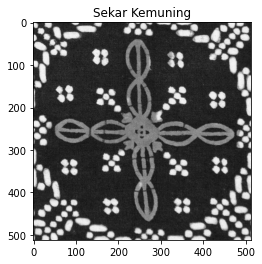

In [5]:
# Data Training
show_image(images_training, labels_training)

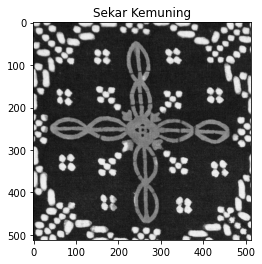

In [6]:
# Data Testing
show_image(images_testing, labels_testing)

Ekstraksi Fitur Tekstur

Ektraksi tekstur dibantu oleh library pyfeats, untuk mempelajari pyfeats beserta algoritma yang digunakan bisa kunjungi https://github.com/giakou4/pyfeats

In [7]:
from pyfeats import *

class Features():    
    #structure of the solution 
    def __init__(self):
        self.FOS =  []
        self.GLCM_mean = []
        self.GLCM_range = []
        self.GLDS = []
        self.NGTDM = []
        self.SFM = []
        self.LTE = []
        self.FDTA =  []
        self.GLRLM = []
        self.FPS = []
        self.HOS = []
        self.LBP = []
        self.GLSZM = []
        self.Labels_FOS =  []
        self.Labels_GLCM_mean = []
        self.Labels_GLCM_range = []
        self.Labels_GLDS = []
        self.Labels_NGTDM = []
        self.Labels_SFM = []
        self.Labels_LTE = []
        self.Labels_FDTA =  []
        self.Labels_GLRLM = []
        self.Labels_FPS = []
        self.Labels_HOS = []
        self.Labels_LBP = []
        self.Labels_GLSZM = []


def extract_texture(images, mask = None):
  FOS =  []
  GLCM_mean = []
  GLCM_range = []
  GLDS = []
  NGTDM = []
  SFM = []
  LTE = []
  FDTA =  []
  GLRLM = []
  FPS = []
  HOS = []
  LBP = []
  GLSZM = []

  for f in images:
    # 1. FOS
    features_FOS, labels_FOS = fos(f, mask)
    FOS.append(features_FOS)
    # 2. GLCM
    features_GLCM_mean, features_GLCM_range, labels_mean, labels_range = glcm_features(f, ignore_zeros=True)
    GLCM_mean.append(features_GLCM_mean)
    GLCM_range.append(features_GLCM_range)
    # 3. GLDS
    features_glds, labels_GLDS = glds_features(f, mask, Dx=[0,1,1,1], Dy=[1,1,0,-1])
    GLDS.append(features_glds)
    # 4. NGTDM
    features_NGTDM, labels_NGTDM = ngtdm_features(f, mask, d=1)
    NGTDM.append(features_NGTDM)
    # 5. SFM
    features_SFM, labels_SFM = sfm_features(f, mask, Lr=4, Lc=4)
    SFM.append(features_SFM)
    # 6. LTE
    features_LTE, labels_LTE = lte_measures(f, mask, l=7)
    LTE.append(features_LTE)
    # 7. FDTA
    h, labels_FDTA = fdta(f, mask, s=3)
    FDTA.append(h)
    # 8. GLRLM
    features_GLRLM, labels_GLRLM = glrlm_features(f, mask, Ng=256)
    GLRLM.append(features_GLRLM)
    # 9. FPS
    features_FPS, labels_FPS = fps(f, mask)
    FPS.append(features_FPS)
    # 10. HOS
    features_HOS, labels_HOS = hos_features(f, th=[135,140])
    HOS.append(features_HOS)
    # 11. LBP
    features_LBP, labels_LBP = lbp_features(f, mask, P=[8,16,24], R=[1,2,3])
    LBP.append(features_LBP)
    # 12. GLSZM
    features_GLSZM, labels_GLSZM = glszm_features(f, mask)
    GLSZM.append(features_GLSZM)
  
  # Panggil Class Features untuk membuat dan mengisi kamus features
  features = Features()
  features.FOS = FOS
  features.GLCM_mean = GLCM_mean
  features.GLCM_range = GLCM_range
  features.GLDS = GLDS
  features.NGTDM = NGTDM
  features.SFM = SFM
  features.LTE = LTE
  features.FDTA =  FDTA
  features.GLRLM = GLRLM
  features.FPS = FPS
  features.HOS = HOS
  features.LBP = LBP
  features.GLSZM = GLSZM
  features.Labels_FOS =  labels_FOS
  features.Labels_GLCM_mean = labels_mean
  features.Labels_GLCM_range = labels_range
  features.Labels_GLDS = labels_GLDS
  features.Labels_NGTDM = labels_NGTDM
  features.Labels_SFM = labels_SFM
  features.Labels_LTE = labels_LTE
  features.Labels_FDTA =  labels_FDTA
  features.Labels_GLRLM = labels_GLRLM
  features.Labels_FPS = labels_FPS
  features.Labels_HOS = labels_HOS
  features.Labels_LBP = labels_LBP
  features.Labels_GLSZM = labels_GLSZM

  return features

In [8]:
# Run function above
# Training
features_training = extract_texture(images_training)
# Testing
features_testing = extract_texture(images_testing)

Transform ke Dataframe

In [11]:
import pandas as pd

class Dataframes():    
    #structure of the solution 
    def __init__(self):
      self.fos = None
      self.GLCM_mean = None
      self.GLCM_range = None
      self.GLDS = None
      self.NGTDM = None
      self.SFM = None
      self.LTE = None
      self.FDTA =  None
      self.GLRLM = None
      self.FPS = None
      self.HOS = None
      self.LBP = None
      self.GLSZM = None
      self.Class = None
       

def convert2dataframe(features, labels):
  df_fos = pd.DataFrame(features.FOS, columns=features.Labels_FOS)
  df_GLCM_mean = pd.DataFrame(features.GLCM_mean, columns=features.Labels_GLCM_mean)
  df_GLCM_range = pd.DataFrame(features.GLCM_range, columns=features.Labels_GLCM_range)
  df_GLDS = pd.DataFrame(features.GLDS, columns=features.Labels_GLDS)
  df_NGTDM = pd.DataFrame(features.NGTDM, columns=features.Labels_NGTDM)
  df_SFM = pd.DataFrame(features.SFM, columns=features.Labels_SFM)
  df_LTE = pd.DataFrame(features.LTE, columns=features.Labels_LTE)
  df_FDTA = pd.DataFrame(features.FDTA, columns=features.Labels_FDTA)
  df_GLRLM = pd.DataFrame(features.GLRLM, columns=features.Labels_GLRLM)
  df_FPS = pd.DataFrame(features.FPS, columns=features.Labels_FPS)
  df_HOS = pd.DataFrame(features.HOS, columns=features.Labels_HOS)
  df_LBP = pd.DataFrame(features.LBP, columns=features.Labels_LBP)
  df_GLSZM = pd.DataFrame(features.GLSZM, columns=features.Labels_GLSZM)
  df_class = pd.DataFrame(labels, columns=["Class"])

  dataframe = Dataframes()
  dataframe.fos = df_fos
  dataframe.GLCM_mean = df_GLCM_mean
  dataframe.GLCM_range = df_GLCM_range
  dataframe.GLDS = df_GLDS
  dataframe.NGTDM = df_NGTDM
  dataframe.SFM = df_SFM
  dataframe.LTE = df_LTE
  dataframe.FDTA =  df_FDTA
  dataframe.GLRLM = df_GLRLM
  dataframe.FPS = df_FPS
  dataframe.HOS = df_HOS
  dataframe.LBP = df_LBP
  dataframe.GLSZM = df_GLSZM
  dataframe.Class = df_class

  return dataframe

In [12]:
# Run function above
# Training
Dataframes_train = convert2dataframe(features_training, labels_training)
# Testing
Dataframes_test = convert2dataframe(features_testing, labels_testing)

1. Fos

In [13]:
Dataframes_train.fos

,FOS_Mean,FOS_Variance,FOS_Median,FOS_Mode,FOS_Skewness,FOS_Kurtosis,FOS_Energy,FOS_Entropy,FOS_MinimalGrayLevel,FOS_MaximalGrayLevel,FOS_CoefficientOfVariation,FOS_10Percentile,FOS_25Percentile,FOS_75Percentile,FOS_90Percentile,FOS_HistogramWidth
0,80.002708,4581.637265,43.0,36.0,1.254807,3.068859,0.017407,4.627740,3.0,249.0,0.081965,30.0,35.0,121.0,217.0,187.0
1,78.087450,4665.059603,39.0,34.0,1.256031,3.063347,0.020649,4.518193,11.0,248.0,0.079974,29.0,33.0,121.0,217.0,188.0
2,77.813860,4670.249710,39.0,34.0,1.258242,3.069566,0.020669,4.517290,10.0,246.0,0.080256,28.0,32.0,121.0,217.0,189.0
3,70.057119,3795.685344,35.0,29.0,1.238480,3.094539,0.021121,4.544128,1.0,240.0,0.084447,25.0,28.0,112.0,185.0,160.0
4,66.233793,3956.128005,30.0,25.0,1.256694,3.148052,0.022584,4.507180,2.0,239.0,0.082695,21.0,24.0,109.0,183.0,162.0
5,65.182510,3965.177424,29.0,24.0,1.260512,3.158787,0.022552,4.505865,4.0,236.0,0.082617,19.0,23.0,108.0,182.0,163.0
6,88.233598,6703.478309,40.0,32.0,0.979784,2.148101,0.017194,4.563899,1.0,251.0,0.071680,26.0,31.0,167.0,232.0,206.0
7,84.196071,7119.300733,33.0,26.0,0.965429,2.112929,0.019367,4.496672,3.0,249.0,0.068228,21.0,25.0,168.0,231.0,210.0
8,90.245512,6905.695654,42.0,34.0,0.995557,2.162863,0.017428,4.517999,0.0,253.0,0.071812,28.0,34.0,170.0,236.0,208.0
9,91.315943,6890.930338,43.0,35.0,0.984535,2.137869,0.017658,4.505758,2.0,252.0,0.071810,29.0,34.0,173.0,237.0,208.0


In [14]:
Dataframes_test.fos

,FOS_Mean,FOS_Variance,FOS_Median,FOS_Mode,FOS_Skewness,FOS_Kurtosis,FOS_Energy,FOS_Entropy,FOS_MinimalGrayLevel,FOS_MaximalGrayLevel,FOS_CoefficientOfVariation,FOS_10Percentile,FOS_25Percentile,FOS_75Percentile,FOS_90Percentile,FOS_HistogramWidth
0,80.851379,4539.856987,44.0,37.0,1.253613,3.065316,0.017506,4.622190,7.0,251.0,0.082043,31.0,36.0,122.0,217.0,186.0
1,67.373204,3862.609613,32.0,27.0,1.249953,3.127189,0.020954,4.550841,1.0,238.0,0.083963,22.0,26.0,110.0,183.0,161.0
2,88.465575,6666.503325,40.0,32.0,0.983304,2.155747,0.017243,4.562066,1.0,253.0,0.071492,27.0,32.0,166.0,232.0,205.0


2. GLCM

In [15]:
Dataframes_train.GLCM_mean

,GLCM_ASM_Mean,GLCM_Contrast_Mean,GLCM_Correlation_Mean,GLCM_SumOfSquaresVariance_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_SumAverage_Mean,GLCM_SumVariance_Mean,GLCM_SumEntropy_Mean,GLCM_Entropy_Mean,GLCM_DifferenceVariance_Mean,GLCM_DifferenceEntropy_Mean,GLCM_Information1_Mean,GLCM_Information2_Mean,GLCM_MaximalCorrelationCoefficient_Mean
0,0.000690,427.479230,0.953000,4549.000469,0.119746,159.108431,17768.522645,7.486084,12.104260,0.000169,5.037199,-0.180900,0.952436,7.465765
1,0.001161,355.632833,0.961619,4634.244542,0.168354,155.323261,18181.345333,7.407102,11.595244,0.000240,4.699875,-0.215014,0.967216,6.660795
2,0.001165,357.017236,0.961514,4639.559226,0.168926,154.773504,18201.219669,7.407078,11.592219,0.000243,4.697507,-0.215052,0.967181,6.637396
3,0.001218,400.592667,0.946942,3775.567476,0.157070,139.526206,14701.677239,7.438937,11.799009,0.000215,4.896035,-0.194420,0.957594,7.235424
4,0.001645,359.036314,0.954296,3928.950705,0.195905,131.783021,15356.766506,7.438956,11.491677,0.000273,4.673560,-0.226549,0.971212,6.705659
5,0.001698,358.785148,0.954416,3936.718151,0.199801,129.666615,15388.087458,7.435207,11.475639,0.000275,4.674417,-0.228583,0.971946,6.720232
6,0.000704,543.928672,0.959142,6658.137597,0.137586,175.302116,26088.621716,7.441703,11.894398,0.000184,5.009383,-0.187105,0.954453,6.493330
7,0.001070,485.544152,0.965683,7075.956189,0.181598,167.319619,27818.280604,7.409657,11.485619,0.000249,4.721302,-0.223233,0.970072,6.114973
8,0.000689,592.205657,0.956796,6855.859983,0.131027,179.256621,26831.234274,7.336642,11.837925,0.000169,5.085092,-0.177590,0.947333,6.580818
9,0.000728,579.373164,0.957674,6845.943653,0.137315,181.474363,26804.401449,7.323114,11.786721,0.000175,5.052523,-0.180568,0.948967,6.562567


In [16]:
Dataframes_test.GLCM_mean

,GLCM_ASM_Mean,GLCM_Contrast_Mean,GLCM_Correlation_Mean,GLCM_SumOfSquaresVariance_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_SumAverage_Mean,GLCM_SumVariance_Mean,GLCM_SumEntropy_Mean,GLCM_Entropy_Mean,GLCM_DifferenceVariance_Mean,GLCM_DifferenceEntropy_Mean,GLCM_Information1_Mean,GLCM_Information2_Mean,GLCM_MaximalCorrelationCoefficient_Mean
0,0.000699,423.678720,0.952993,4507.909449,0.121160,160.805446,17607.959077,7.478535,12.088472,0.000169,5.028797,-0.181129,0.952429,7.401321
1,0.001192,409.464456,0.946702,3841.828731,0.155221,134.182005,14957.850468,7.450258,11.821494,0.000215,4.908793,-0.193667,0.957334,7.274680
2,0.000707,543.201765,0.958973,6621.864545,0.136849,175.786931,25944.256415,7.439476,11.891505,0.000183,5.008959,-0.186899,0.954311,6.494093


In [17]:
Dataframes_train.GLCM_range

,GLCM_ASM_Range,GLCM_Contrast_Range,GLCM_Correlation_Range,GLCM_SumOfSquaresVariance_Range,GLCM_InverseDifferenceMoment_Range,GLCM_SumAverage_Range,GLCM_SumVariance_Range,GLCM_SumEntropy_Range,GLCM_Entropy_Range,GLCM_DifferenceVariance_Range,GLCM_DifferenceEntropy_Range,GLCM_Information1_Range,GLCM_Information2_Range,GLCM_MaximalCorrelationCoefficient_Range
0,0.000135,283.407809,0.031259,10.278742,0.040339,0.196957,324.522777,0.089172,0.287273,0.000059,0.454382,0.043588,0.027489,0.152919
1,0.000306,254.556964,0.027550,10.789696,0.054871,0.199632,297.715748,0.046446,0.359639,0.000084,0.489321,0.055890,0.023511,0.359036
2,0.000313,254.812196,0.027547,10.844180,0.056480,0.199497,298.188915,0.044477,0.363701,0.000087,0.492086,0.056530,0.023849,0.386811
3,0.000324,259.280372,0.034400,5.027385,0.052122,0.030215,279.389914,0.059888,0.371342,0.000082,0.488071,0.057108,0.029912,0.412482
4,0.000525,243.642785,0.031078,10.191924,0.065787,0.193862,265.329386,0.021996,0.412896,0.000097,0.493157,0.064189,0.022337,0.430561
5,0.000523,244.292936,0.031103,11.769806,0.063938,0.221348,266.354038,0.019963,0.414428,0.000102,0.505100,0.064286,0.021792,0.482928
6,0.000145,327.399943,0.024653,15.417241,0.042031,0.368838,376.768500,0.061127,0.275674,0.000062,0.444028,0.042595,0.025203,0.329878
7,0.000279,299.076007,0.021164,16.130093,0.060701,0.379554,361.324532,0.024718,0.337341,0.000085,0.472710,0.052777,0.020036,0.206972
8,0.000156,371.100635,0.027167,16.541785,0.047817,0.380072,437.218810,0.104340,0.282890,0.000068,0.490972,0.043998,0.029097,0.488115
9,0.000171,365.119439,0.026759,16.193863,0.049748,0.375992,429.715667,0.100857,0.285467,0.000068,0.485373,0.044485,0.028501,0.494907


In [18]:
Dataframes_test.GLCM_range

,GLCM_ASM_Range,GLCM_Contrast_Range,GLCM_Correlation_Range,GLCM_SumOfSquaresVariance_Range,GLCM_InverseDifferenceMoment_Range,GLCM_SumAverage_Range,GLCM_SumVariance_Range,GLCM_SumEntropy_Range,GLCM_Entropy_Range,GLCM_DifferenceVariance_Range,GLCM_DifferenceEntropy_Range,GLCM_Information1_Range,GLCM_Information2_Range,GLCM_MaximalCorrelationCoefficient_Range
0,0.000141,281.427681,0.031322,10.080776,0.041530,0.193974,321.750786,0.089900,0.289758,0.000060,0.458573,0.044010,0.027706,0.145862
1,0.000318,265.006226,0.034555,5.218438,0.050693,0.028890,285.879977,0.059096,0.369773,0.000083,0.490206,0.056863,0.029972,0.447816
2,0.000145,328.768001,0.024887,15.585470,0.040875,0.372058,377.070676,0.061500,0.273660,0.000062,0.446099,0.042274,0.025068,0.425960


3. GLDS

In [19]:
Dataframes_train.GLDS

,GLDS_Homogeneity,GLDS_Contrast,GLDS_ASM,GLDS_Entopy,GLDS_Mean
0,32070.530429,1.117025e+08,3.169613e+09,-2.355670e+06,3253720.00
1,44777.615839,9.292679e+07,4.383934e+09,-2.417078e+06,2711943.50
2,44927.014591,9.328852e+07,4.406099e+09,-2.417507e+06,2712621.25
3,41827.836054,1.046757e+08,3.848370e+09,-2.381485e+06,3023843.25
4,51979.657651,9.381572e+07,4.797068e+09,-2.422005e+06,2718096.50
5,52997.652977,9.375011e+07,4.778046e+09,-2.421909e+06,2712928.75
6,36734.532464,1.421293e+08,3.458838e+09,-2.360841e+06,3362653.00
7,48240.448846,1.268718e+08,4.555543e+09,-2.413285e+06,2953177.25
8,35019.434256,1.547511e+08,3.222018e+09,-2.347095e+06,3533448.00
9,36663.729862,1.513911e+08,3.320869e+09,-2.353048e+06,3463535.25


In [20]:
Dataframes_test.GLDS

,GLDS_Homogeneity,GLDS_Contrast,GLDS_ASM,GLDS_Entopy,GLDS_Mean
0,32440.166403,1.107094e+08,3.193400e+09,-2.357204e+06,3234755.75
1,41344.457723,1.069939e+08,3.821792e+09,-2.379162e+06,3054003.50
2,36541.648207,1.419394e+08,3.461021e+09,-2.360912e+06,3362733.75


4. NGTDM

In [21]:
Dataframes_train.NGTDM

,NGTDM_Coarseness,NGTDM_Contrast,NGTDM_Busyness,NGTDM_Complexity,NGTDM_Strngth
0,11.518822,1.002238,0.000004,222432.406059,8.024940e+05
1,14.620333,0.740386,0.000004,151124.857942,1.081597e+06
2,14.586056,0.740494,0.000004,150535.281722,1.076298e+06
3,13.260208,0.705051,0.000005,165476.705718,8.624027e+05
4,16.349666,0.579946,0.000005,129869.650217,1.119802e+06
5,16.425463,0.578931,0.000005,127917.525193,1.110303e+06
6,11.608388,1.438529,0.000003,240139.162359,9.476817e+05
7,14.749030,1.187078,0.000003,178912.300480,1.254440e+06
8,10.299527,1.627991,0.000003,275152.443248,8.854951e+05
9,10.505403,1.592547,0.000003,262714.498459,8.825318e+05


In [22]:
Dataframes_test.NGTDM

,NGTDM_Coarseness,NGTDM_Contrast,NGTDM_Busyness,NGTDM_Complexity,NGTDM_Strngth
0,11.509744,0.987194,0.000004,217978.874321,797427.540399
1,13.207607,0.724751,0.000005,168433.788591,861016.336739
2,11.604020,1.430311,0.000003,239031.518073,945899.468629


5. SFM

In [23]:
Dataframes_train.SFM

,SFM_Coarseness,SFM_Contrast,SFM_Periodicity,SFM_Roughness
0,4.207072,29.239673,0.561965,2.376760
1,4.484863,26.669564,0.615944,2.260172
2,4.482395,26.721423,0.615865,2.259819
3,4.069529,28.305217,0.614620,2.274377
4,4.173872,26.796877,0.648065,2.200127
5,4.179285,26.787503,0.649542,2.199237
6,3.751150,32.982682,0.594771,2.296617
7,3.905010,31.162290,0.634387,2.213704
8,3.682956,34.416012,0.592057,2.327338
9,3.745654,34.040363,0.592342,2.324269


In [24]:
Dataframes_test.SFM

,SFM_Coarseness,SFM_Contrast,SFM_Periodicity,SFM_Roughness
0,4.233322,29.109405,0.562325,2.376289
1,4.029427,28.616934,0.614680,2.274877
2,3.753171,32.960636,0.593978,2.297567


6. LTE

In [26]:
Dataframes_train.LTE

,LTE_LL_7,LTE_EE_7,LTE_SS_7,LTE_LE_7,LTE_ES_7,LTE_LS_7
0,256674.237497,2846.814547,377.528012,22681.326084,933.479431,5524.395306
1,261022.495193,2774.031010,338.581337,22576.855742,881.149942,5384.305056
2,261301.138744,2775.646000,339.347460,22593.380644,882.537505,5393.955645
3,232134.627238,2870.189013,387.229733,22778.299358,949.381053,5708.568113
4,236588.775199,2828.293581,356.444941,23004.831561,908.104630,5682.873968
5,236469.330945,2833.844263,357.308236,23013.485500,909.074644,5678.450580
6,312304.628135,3281.669389,424.928572,26701.920402,1086.950427,6590.262203
7,324807.883934,3199.686827,386.881829,26845.478606,1030.515476,6544.916287
8,316045.684787,3384.229403,449.545384,27205.389292,1139.739288,6868.319224
9,317346.016488,3316.661462,441.248893,26870.671850,1118.059318,6836.303597


In [27]:
Dataframes_test.LTE

,LTE_LL_7,LTE_EE_7,LTE_SS_7,LTE_LE_7,LTE_ES_7,LTE_LS_7
0,255724.664323,2827.002401,375.295696,22532.094314,927.832667,5490.249847
1,234010.071878,2903.954235,392.542212,23052.060834,960.750723,5770.452776
2,311549.677372,3278.814026,424.946716,26663.441301,1086.190009,6574.564791


7. FDTA

In [28]:
Dataframes_train.FDTA

,FDTA_HurstCoeff_1,FDTA_HurstCoeff_2,FDTA_HurstCoeff_3,FDTA_HurstCoeff_4
0,0.353861,0.479711,0.455905,0.245303
1,0.447014,0.498935,0.462089,0.235140
2,0.447695,0.498399,0.465826,0.240111
3,0.432020,0.479159,0.349667,0.233412
4,0.493915,0.491360,0.355517,0.235864
5,0.494323,0.493641,0.352397,0.232575
6,0.410143,0.499581,0.479035,0.267116
7,0.479403,0.513834,0.489751,0.268984
8,0.384577,0.494401,0.476378,0.274998
9,0.387520,0.494364,0.483156,0.269775


In [29]:
Dataframes_test.FDTA

,FDTA_HurstCoeff_1,FDTA_HurstCoeff_2,FDTA_HurstCoeff_3,FDTA_HurstCoeff_4
0,0.354137,0.479764,0.460489,0.237673
1,0.431535,0.479256,0.347634,0.221221
2,0.409449,0.498034,0.478155,0.270001


8. GLRLM

In [30]:
Dataframes_train.GLRLM

,GLRLM_ShortRunEmphasis,GLRLM_LongRunEmphasis,GLRLM_GrayLevelNo-Uniformity,GLRLM_RunLengthNonUniformity,GLRLM_RunPercentage,GLRLM_LowGrayLevelRunEmphasis,GLRLM_HighGrayLevelRunEmphasis,GLRLM_Short owGrayLevelEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis,GLRLM_LongRunLowGrayLevelEmphasis,GLRLM_LongRunHighGrayLevelEmphasis
0,0.968521,1.140424,4217.054256,231033.476110,1.922430,5.853472e-04,10797.212080,5.643173e-04,10489.302647,1.0,12182.295518
1,0.953672,1.223727,4816.048619,217467.935608,1.880227,6.447057e-04,10634.002672,6.082550e-04,10213.705395,1.0,12727.446473
2,0.953688,1.223336,4825.845455,217483.411840,1.880327,6.556626e-04,10597.490885,6.186346e-04,10177.695138,1.0,12664.711444
3,0.957007,1.208694,4865.138589,220350.812219,1.888503,4.056331e+10,8763.495277,4.056331e+10,8558.398720,1.0,9665.495171
4,0.944811,1.314212,5038.696304,209166.673731,1.849343,1.195171e-03,8509.521820,1.099209e-03,8265.659261,1.0,9698.004166
5,0.943936,1.416642,5022.436691,207477.170802,1.838122,1.298235e-03,8420.524853,1.190079e-03,8171.794031,1.0,9614.316348
6,0.962983,1.176991,4165.467767,225744.060526,1.905170,4.020657e+10,14008.228926,4.020657e+10,13368.500526,1.0,17449.169609
7,0.949580,1.291429,4550.274212,213141.794314,1.861405,1.133604e-03,13709.769543,1.069435e-03,12946.099828,1.0,19537.298322
8,0.964719,1.174025,4252.442763,227204.539529,1.908509,4.013607e+10,14310.509714,4.013607e+10,13535.288451,1.0,18807.048852
9,0.962813,1.194720,4290.107543,225261.275011,1.901225,6.395591e-04,14408.707838,6.196082e-04,13579.305571,1.0,19796.558206


In [31]:
Dataframes_test.GLRLM

,GLRLM_ShortRunEmphasis,GLRLM_LongRunEmphasis,GLRLM_GrayLevelNo-Uniformity,GLRLM_RunLengthNonUniformity,GLRLM_RunPercentage,GLRLM_LowGrayLevelRunEmphasis,GLRLM_HighGrayLevelRunEmphasis,GLRLM_Short owGrayLevelEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis,GLRLM_LongRunLowGrayLevelEmphasis,GLRLM_LongRunHighGrayLevelEmphasis
0,0.968004,1.143665,4239.777445,230538.360557,1.920875,5.475498e-04,10878.960461,5.276843e-04,10556.957222,1.0,12355.090465
1,0.957927,1.203507,4845.223586,221165.260945,1.891056,4.050778e+10,8462.089306,4.050778e+10,8273.011378,1.0,9290.610070
2,0.963330,1.174840,4178.324903,226068.666952,1.906252,8.036695e+10,14029.891673,8.036695e+10,13403.466081,1.0,17373.055097


9. FPS

In [32]:
Dataframes_train.FPS

,FPS_RadialSum,FPS_AngularSum
0,50118.535736,18687.316746
1,49530.660287,18730.359591
2,49432.262538,18730.394211
3,43196.811127,20042.877447
4,41777.099696,20705.502363
5,41340.288512,20771.458041
6,57519.794071,21605.001558
7,56741.642328,21981.566149
8,59791.290955,18614.496138
9,60198.338679,18556.884939


In [33]:
Dataframes_test.FPS

,FPS_RadialSum,FPS_AngularSum
0,50392.413134,18608.699669
1,42155.441585,20301.182517
2,57473.927532,21749.899251


10. HOS

In [34]:
Dataframes_train.HOS

,HOS_135_degrees,HOS_140_degrees
0,8.883497,8.180153
1,8.295613,8.228810
2,8.252158,8.101032
3,8.827885,8.158363
4,8.512271,7.818471
5,8.602504,8.023038
6,8.401792,7.879757
7,8.438899,8.033337
8,8.567683,8.214679
9,8.354722,8.006563


In [35]:
Dataframes_test.HOS

,HOS_135_degrees,HOS_140_degrees
0,8.656445,8.170909
1,8.583384,7.818498
2,8.603285,8.085233


11. LBP

In [36]:
Dataframes_train.LBP

,LBP_R_1_P_8_energy,LBP_R_1_P_8_entropy,LBP_R_2_P_16_energy,LBP_R_2_P_16_entropy,LBP_R_3_P_24_energy,LBP_R_3_P_24_entropy
0,6.741156,-1.826373,14.872068,-2.647151,22.824681,-3.088325
1,6.297729,-1.755904,14.349388,-2.602545,22.313193,-3.058289
2,6.292847,-1.755120,14.341773,-2.601811,22.308483,-3.057810
3,6.344730,-1.763582,14.246156,-2.593940,22.197164,-3.051959
4,6.057233,-1.719126,13.786143,-2.554973,21.745832,-3.025483
5,6.061605,-1.720228,13.769993,-2.553927,21.718380,-3.024123
6,6.578438,-1.800686,14.578132,-2.621606,22.421173,-3.064011
7,6.235960,-1.747327,14.104408,-2.581406,21.943190,-3.036168
8,6.722931,-1.824087,14.769681,-2.637854,22.640010,-3.076763
9,6.690893,-1.819280,14.749084,-2.636134,22.635258,-3.076580


In [37]:
Dataframes_test.LBP

,LBP_R_1_P_8_energy,LBP_R_1_P_8_entropy,LBP_R_2_P_16_energy,LBP_R_2_P_16_entropy,LBP_R_3_P_24_energy,LBP_R_3_P_24_entropy
0,6.733710,-1.825029,14.867035,-2.646643,22.822838,-3.088293
1,6.343012,-1.763061,14.261964,-2.595458,22.201533,-3.052334
2,6.571951,-1.799433,14.587212,-2.622405,22.429598,-3.064488


12. GLSZM

In [38]:
Dataframes_train.GLSZM

,GLSZM_SmallZoneEmphasis,GLSZM_LargeZoneEmphasis,GLSZM_GrayLevelNonuniformity,GLSZM_ZoneSizeNonuniformity,GLSZM_ZonePercentage,GLSZM_LowGrayLeveLZoneEmphasis,GLSZM_HighGrayLevelZoneEmphasis,GLSZM_SmallZoneLowGrayLevelEmphasis,GLSZM_SmallZoneHighGrayLevelEmphasis,GLSZM_LargeZoneLowGrayLevelEmphassis,GLSZM_LargeZoneHighGrayLevelEmphasis,GLSZM_GrayLevelVariance,GLSZM_ZoneSizeVariance,GLSZM_ZoneSizeEntropy
0,0.236644,-230285.753478,0.016216,0.834646,835.330314,0.000520,11169.183211,0.000120,2652.825188,-41.063468,166348.143937,6.601565e-07,0.000005,-7.227250
1,0.230575,-300514.394017,0.018438,0.772806,745.048222,0.000564,11094.176992,0.000126,2588.499581,-89.389977,-11375.912960,6.310459e-07,0.000005,-7.297419
2,0.230553,-281189.217087,0.018523,0.772438,745.607327,0.000573,11048.309661,0.000128,2575.589995,-68.579426,22709.976675,6.244394e-07,0.000005,-7.293935
3,0.232020,-297175.846697,0.018042,0.788009,761.125145,0.000720,9464.534424,0.000161,2266.654758,-120.794164,26512.043188,4.685182e-07,0.000005,-7.326670
4,0.227956,-252013.867824,0.018715,0.749725,688.714368,0.000949,9314.814541,0.000205,2208.822416,-61.945749,-132250.536750,4.146399e-07,0.000006,-7.432872
5,0.228143,-272976.908053,0.018773,0.751124,683.834135,0.001025,9203.685990,0.000223,2181.377518,-50.703598,22683.699476,4.029985e-07,0.000006,-7.425857
6,0.234560,-254321.047654,0.016356,0.813528,797.532772,0.000646,14064.560737,0.000149,3262.565444,-71.628351,28469.090193,1.019223e-06,0.000005,-7.195211
7,0.228970,-290189.365290,0.018177,0.759167,702.120812,0.000949,13553.701173,0.000213,3080.267680,-118.815952,170313.367690,8.769258e-07,0.000006,-7.285475
8,0.235627,-215786.731776,0.016841,0.825284,807.352296,0.000608,14024.322475,0.000143,3219.019222,-65.992135,72874.530797,1.105993e-06,0.000005,-7.085739
9,0.234843,-180726.343430,0.017071,0.817536,790.327350,0.000568,13998.205920,0.000133,3196.248741,-57.175883,-97114.747169,1.089795e-06,0.000005,-7.097238


In [39]:
Dataframes_test.GLSZM

,GLSZM_SmallZoneEmphasis,GLSZM_LargeZoneEmphasis,GLSZM_GrayLevelNonuniformity,GLSZM_ZoneSizeNonuniformity,GLSZM_ZonePercentage,GLSZM_LowGrayLeveLZoneEmphasis,GLSZM_HighGrayLevelZoneEmphasis,GLSZM_SmallZoneLowGrayLevelEmphasis,GLSZM_SmallZoneHighGrayLevelEmphasis,GLSZM_LargeZoneLowGrayLevelEmphassis,GLSZM_LargeZoneHighGrayLevelEmphasis,GLSZM_GrayLevelVariance,GLSZM_ZoneSizeVariance,GLSZM_ZoneSizeEntropy
0,0.236460,-248984.459346,0.016296,0.832974,831.424867,0.000490,11254.955345,0.000113,2672.004989,-57.484375,212094.575883,6.783857e-07,0.000005,-7.226966
1,0.232513,-295882.623457,0.018050,0.792997,768.041551,0.000894,9129.479244,0.000201,2190.130077,-150.755695,30940.860995,4.282142e-07,0.000005,-7.316355
2,0.234691,-235297.840501,0.016384,0.814717,800.509587,0.000626,14099.876898,0.000145,3271.080677,-50.302267,8706.468130,1.018122e-06,0.000005,-7.188854


Class Target (Labels)

In [40]:
Dataframes_train.Class

,Class
0,Sekar Kemuning
1,Sekar Kemuning
2,Sekar Kemuning
3,Sekar Liring
4,Sekar Liring
5,Sekar Liring
6,Sekar Duren
7,Sekar Duren
8,Sekar Duren
9,Sekar Duren


In [41]:
Dataframes_test.Class

,Class
0,Sekar Kemuning
1,Sekar Liring
2,Sekar Duren


Gabungkan Semua Dataframe

In [42]:
df_result_training = pd.concat([Dataframes_train.fos, 
                                Dataframes_train.GLCM_mean, 
                                Dataframes_train.GLCM_range,
                                Dataframes_train.GLDS, 
                                Dataframes_train.NGTDM, 
                                Dataframes_train.SFM, 
                                Dataframes_train.LTE, 
                                Dataframes_train.FDTA, 
                                Dataframes_train.GLRLM, 
                                Dataframes_train.FPS, 
                                Dataframes_train.HOS, 
                                Dataframes_train.LBP, 
                                Dataframes_train.GLSZM,
                                Dataframes_train.Class], axis=1)
df_result_training

,FOS_Mean,FOS_Variance,FOS_Median,FOS_Mode,FOS_Skewness,FOS_Kurtosis,FOS_Energy,FOS_Entropy,FOS_MinimalGrayLevel,FOS_MaximalGrayLevel,...,GLSZM_LowGrayLeveLZoneEmphasis,GLSZM_HighGrayLevelZoneEmphasis,GLSZM_SmallZoneLowGrayLevelEmphasis,GLSZM_SmallZoneHighGrayLevelEmphasis,GLSZM_LargeZoneLowGrayLevelEmphassis,GLSZM_LargeZoneHighGrayLevelEmphasis,GLSZM_GrayLevelVariance,GLSZM_ZoneSizeVariance,GLSZM_ZoneSizeEntropy,Class
0,80.002708,4581.637265,43.0,36.0,1.254807,3.068859,0.017407,4.627740,3.0,249.0,...,0.000520,11169.183211,0.000120,2652.825188,-41.063468,166348.143937,6.601565e-07,0.000005,-7.227250,Sekar Kemuning
1,78.087450,4665.059603,39.0,34.0,1.256031,3.063347,0.020649,4.518193,11.0,248.0,...,0.000564,11094.176992,0.000126,2588.499581,-89.389977,-11375.912960,6.310459e-07,0.000005,-7.297419,Sekar Kemuning
2,77.813860,4670.249710,39.0,34.0,1.258242,3.069566,0.020669,4.517290,10.0,246.0,...,0.000573,11048.309661,0.000128,2575.589995,-68.579426,22709.976675,6.244394e-07,0.000005,-7.293935,Sekar Kemuning
3,70.057119,3795.685344,35.0,29.0,1.238480,3.094539,0.021121,4.544128,1.0,240.0,...,0.000720,9464.534424,0.000161,2266.654758,-120.794164,26512.043188,4.685182e-07,0.000005,-7.326670,Sekar Liring
4,66.233793,3956.128005,30.0,25.0,1.256694,3.148052,0.022584,4.507180,2.0,239.0,...,0.000949,9314.814541,0.000205,2208.822416,-61.945749,-132250.536750,4.146399e-07,0.000006,-7.432872,Sekar Liring
5,65.182510,3965.177424,29.0,24.0,1.260512,3.158787,0.022552,4.505865,4.0,236.0,...,0.001025,9203.685990,0.000223,2181.377518,-50.703598,22683.699476,4.029985e-07,0.000006,-7.425857,Sekar Liring
6,88.233598,6703.478309,40.0,32.0,0.979784,2.148101,0.017194,4.563899,1.0,251.0,...,0.000646,14064.560737,0.000149,3262.565444,-71.628351,28469.090193,1.019223e-06,0.000005,-7.195211,Sekar Duren
7,84.196071,7119.300733,33.0,26.0,0.965429,2.112929,0.019367,4.496672,3.0,249.0,...,0.000949,13553.701173,0.000213,3080.267680,-118.815952,170313.367690,8.769258e-07,0.000006,-7.285475,Sekar Duren
8,90.245512,6905.695654,42.0,34.0,0.995557,2.162863,0.017428,4.517999,0.0,253.0,...,0.000608,14024.322475,0.000143,3219.019222,-65.992135,72874.530797,1.105993e-06,0.000005,-7.085739,Sekar Duren
9,91.315943,6890.930338,43.0,35.0,0.984535,2.137869,0.017658,4.505758,2.0,252.0,...,0.000568,13998.205920,0.000133,3196.248741,-57.175883,-97114.747169,1.089795e-06,0.000005,-7.097238,Sekar Duren


In [43]:
df_result_testing = pd.concat([Dataframes_test.fos, 
                                Dataframes_test.GLCM_mean, 
                                Dataframes_test.GLCM_range,
                                Dataframes_test.GLDS, 
                                Dataframes_test.NGTDM, 
                                Dataframes_test.SFM, 
                                Dataframes_test.LTE, 
                                Dataframes_test.FDTA, 
                                Dataframes_test.GLRLM, 
                                Dataframes_test.FPS, 
                                Dataframes_test.HOS, 
                                Dataframes_test.LBP, 
                                Dataframes_test.GLSZM,
                                Dataframes_test.Class], axis=1)
df_result_testing

,FOS_Mean,FOS_Variance,FOS_Median,FOS_Mode,FOS_Skewness,FOS_Kurtosis,FOS_Energy,FOS_Entropy,FOS_MinimalGrayLevel,FOS_MaximalGrayLevel,...,GLSZM_LowGrayLeveLZoneEmphasis,GLSZM_HighGrayLevelZoneEmphasis,GLSZM_SmallZoneLowGrayLevelEmphasis,GLSZM_SmallZoneHighGrayLevelEmphasis,GLSZM_LargeZoneLowGrayLevelEmphassis,GLSZM_LargeZoneHighGrayLevelEmphasis,GLSZM_GrayLevelVariance,GLSZM_ZoneSizeVariance,GLSZM_ZoneSizeEntropy,Class
0,80.851379,4539.856987,44.0,37.0,1.253613,3.065316,0.017506,4.622190,7.0,251.0,...,0.000490,11254.955345,0.000113,2672.004989,-57.484375,212094.575883,6.783857e-07,0.000005,-7.226966,Sekar Kemuning
1,67.373204,3862.609613,32.0,27.0,1.249953,3.127189,0.020954,4.550841,1.0,238.0,...,0.000894,9129.479244,0.000201,2190.130077,-150.755695,30940.860995,4.282142e-07,0.000005,-7.316355,Sekar Liring
2,88.465575,6666.503325,40.0,32.0,0.983304,2.155747,0.017243,4.562066,1.0,253.0,...,0.000626,14099.876898,0.000145,3271.080677,-50.302267,8706.468130,1.018122e-06,0.000005,-7.188854,Sekar Duren


Save Dataframe

In [44]:
df_result_training.to_csv("Datasets Training.csv", index=False)
df_result_testing.to_csv("Datasets Testing.csv", index=False)